# NYC Weather Data Analysis
___

## 1. Data Description & Purpose
---

These data files are from NOAA online weather, representing data retrieved from a weather station located in Central Park, NY.  It contains daily weather temperatures (max, min, average) as well as precipitation, snowfall, and snow depth readings.

[NOAA Online Weather](http://w2.weather.gov/climate/xmacis.php?wfo=okx)

The purpose of this analysis is to identify pleasant weather days over the months of August to September.  We will be doing so by identifying days that have been historically pleasant over the course of 2014, 2015, 2016.  

For the purpose of this analysis, we have define a pleasant day as
* A day having an average temperature above 60F, and
* A day having less than 0.05mm of precipitation



## 2. Data Import

The data has been scrapped from the above website and placed into a csv file named 'nyc_temperature.csv'.  We can read this data into a dataframe to begin working with the data

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime

sns.set_style('white')

# import the weather data into a dataframe
nyc_temp = pd.read_csv('./data/nyc_weather.csv', parse_dates=['date'], index_col=0)

## 3. Data Exploration

Let's look at the descriptive data statisics to explore the data set

In [27]:
nyc_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276 entries, 2014-08-01 to 2016-10-31
Data columns (total 6 columns):
temp_max         276 non-null int64
temp_min         276 non-null int64
temp_avg         276 non-null float64
precipitation    276 non-null object
new_snow         276 non-null int64
snow_depth       276 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 15.1+ KB


Precipitation is listed as an object versus a float - this is because we have some days were trace amounts of precipitation was observed.  These days are denoted with a value of 'T'.  Let's assume that trace amounts of precipitation are '0' mm for this analysis.  We can convert this column using the function below:

In [28]:
def convert_precip(p):
    """
        Validates a percipitation amount to verify if percipitation was observed
        for a given day.
        
        Returns the amount of precipitation observed.  In cases where trace amounts
        were recorded, we will return 0
    """
    try: 
        return float(p)

    except:
            return 0


In [29]:
nyc_temp.precipitation = [convert_precip(p) for p in nyc_temp.precipitation]

In [30]:
nyc_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276 entries, 2014-08-01 to 2016-10-31
Data columns (total 6 columns):
temp_max         276 non-null int64
temp_min         276 non-null int64
temp_avg         276 non-null float64
precipitation    276 non-null float64
new_snow         276 non-null int64
snow_depth       276 non-null int64
dtypes: float64(2), int64(4)
memory usage: 15.1 KB


This looks better now. Let's continue on to look at some descriptive statistics

In [31]:
nyc_temp.describe()

,temp_max,temp_min,temp_avg,precipitation,new_snow,snow_depth
count,276.000000,276.000000,276.000000,276.000000,276.0,276.0
mean,76.851449,62.000000,69.425725,0.100290,0.0,0.0
std,10.660873,9.623456,9.949642,0.274095,0.0,0.0
min,50.000000,35.000000,44.000000,0.000000,0.0,0.0
25%,69.000000,55.000000,62.500000,0.000000,0.0,0.0
50%,79.000000,63.500000,71.500000,0.000000,0.0,0.0
75%,86.000000,69.250000,77.500000,0.010000,0.0,0.0
max,97.000000,81.000000,88.500000,1.580000,0.0,0.0


In [32]:
nyc_temp.head()

,temp_max,temp_min,temp_avg,precipitation,new_snow,snow_depth
date,,,,,,
2014-08-01,84,71,77.5,0.00,0,0
2014-08-02,74,63,68.5,0.41,0,0
2014-08-03,76,66,71.0,0.07,0,0
2014-08-04,84,70,77.0,0.00,0,0
2014-08-05,90,71,80.5,0.00,0,0


Let's export our cleaned data

In [33]:
# export to file
nyc_temp.to_csv('./data/nyc_weather_cleaned.csv')

## 4. Exploring Average Temperature

We want to be able to group temperatures by the day of the month, so we will create a new fields for this using the code below

In [34]:
# create a month_day column that can be used for plotting
nyc_temp['month_day'] = [d.strftime('%b %d') for d in nyc_temp.index]
nyc_temp.head()

,temp_max,temp_min,temp_avg,precipitation,new_snow,snow_depth,month_day
date,,,,,,,
2014-08-01,84,71,77.5,0.00,0,0,Aug 01
2014-08-02,74,63,68.5,0.41,0,0,Aug 02
2014-08-03,76,66,71.0,0.07,0,0,Aug 03
2014-08-04,84,70,77.0,0.00,0,0,Aug 04
2014-08-05,90,71,80.5,0.00,0,0,Aug 05


Great, now with the month day column, we are able to graph the average temperature.

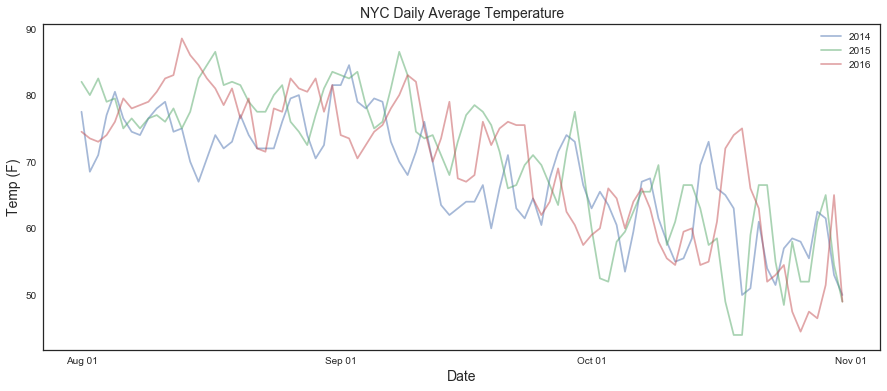

In [48]:
from datetime import datetime
from matplotlib import dates

# create the figure
fig, ax = plt.subplots(figsize=(15,6)) 

# loop through the years
for year in np.unique(nyc_temp.index.year):

    # get the data for the current year
    df = nyc_temp[str(year)]

    # create our x values (we need to map the date value to a number format)
    x = dates.date2num([datetime.strptime(d, '%b %d') for d in df['month_day']])

    # our y values will just be the average temperature
    y = df['temp_avg']

    # plot the data
    plt.plot(x, y, alpha=0.5, label = year)

# we want to format the x axis to show the month and day
xaxis_label_formatter = dates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(xaxis_label_formatter)
ax.xaxis.set_major_locator(dates.MonthLocator())  
    
# setup our labels
plt.title('NYC Daily Average Temperature', fontsize=14)
plt.ylabel('Temp (F)', fontsize=14)
plt.xlabel('Date', fontsize=14)

# setup legend
plt.legend(loc='best')
fig.savefig('./figures/nyc_daily_temp')
plt.show()

If we plot the daily average of 3 years worth of data? 

In [36]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Dec']
days = ['01', '02', '03', '04', '05', '06', '07', '08', '09', 
        '10', '11', '12', '13', '14', '15','16', '17', '18', '19', 
        '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31']

# Group by month & day & find the mean
nyc_temp_daily_avg = nyc_temp.groupby([nyc_temp.index.month, nyc_temp.index.day]).mean()

# Add the daily identifier
nyc_temp_daily_avg['month_day'] = [months[m-1] + ' ' + days[d-1] for m, d in list(nyc_temp_daily_avg.index)]

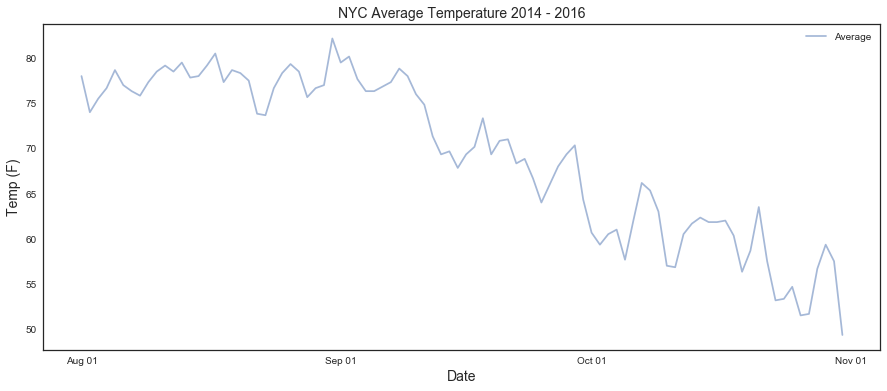

In [49]:
# create the figure
fig, ax = plt.subplots(figsize=(15,6)) 

# plot the daily average
x = dates.date2num([datetime.strptime(d, '%b %d') for d in nyc_temp_daily_avg['month_day']])
y = nyc_temp_daily_avg['temp_avg']
plt.plot(x, y, alpha=0.5, label='Average')

# we want to format the x axis to show the month and day
xaxis_label_formatter = dates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(xaxis_label_formatter)
ax.xaxis.set_major_locator(dates.MonthLocator())  
    
# setup our labels
plt.title('NYC Average Temperature 2014 - 2016', fontsize=14)
plt.ylabel('Temp (F)', fontsize=14)
plt.xlabel('Date', fontsize=14)

# setup legend
plt.legend(loc='best')
fig.savefig('./figures/nyc_daily_avg_temp')
plt.show()

We've defined that a pleasant day must be above 60F - Having a look at the above graph, we can see that as we approach October, the likelihood that our days begin to dip below this pleasant mark increases.  

The closer we get to November, the less likely we will experience days with an average temperature of 60F.  

What was the average temperature in each month?

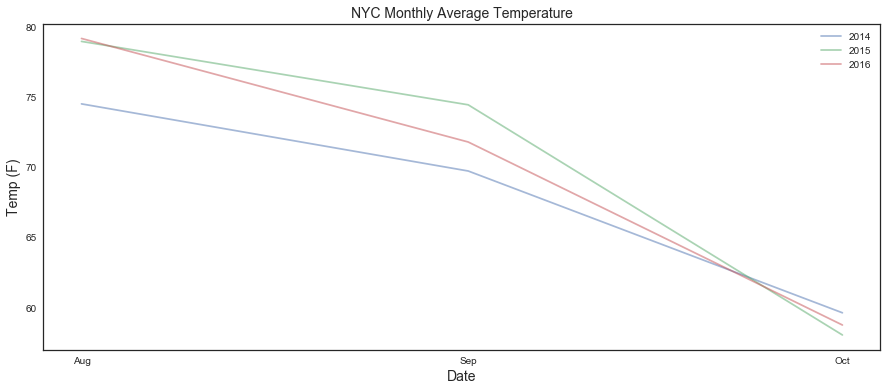

date
2014-08-31    74.516129
2014-09-30    69.733333
2014-10-31    59.629032
2015-08-31    78.967742
2015-09-30    74.450000
2015-10-31    58.048387
2016-08-31    79.177419
2016-09-30    71.800000
2016-10-31    58.758065
Name: temp_avg, dtype: float64


In [50]:
nyc_temp_monthly = nyc_temp.temp_avg.resample('M').mean()
nyc_temp_monthly_avg = nyc_temp_monthly[(nyc_temp_monthly.index.month == 8) | (nyc_temp_monthly.index.month == 9) | (nyc_temp_monthly.index.month == 10)]

#create the figure
fig, ax = plt.subplots(figsize=(15,6)) 

# loop through the years
for year in np.unique(nyc_temp_monthly_avg.index.year):

    # get the data for the current year
    df = nyc_temp_monthly_avg[str(year)]

    # create our x values (we need to map the date value to a number format)
    x = dates.date2num([d.replace(year=2016, day=1) for d in df.index])

    # our y values will just be the average temperature
    y = df.values

    # plot the data
    plt.plot(x, y, alpha=0.5, label = year)

# we want to format the x axis to show the month and day
xaxis_label_formatter = dates.DateFormatter('%b')
ax.xaxis.set_major_formatter(xaxis_label_formatter)
ax.xaxis.set_major_locator(dates.MonthLocator())  
    
# setup our labels
plt.title('NYC Monthly Average Temperature', fontsize=14)
plt.ylabel('Temp (F)', fontsize=14)
plt.xlabel('Date', fontsize=14)

# setup legend
plt.legend(loc='best')
fig.savefig('./figures/nyc_monthly_avg_temp')
plt.show()
print(nyc_temp_monthly_avg)

## 5. Exploring Precipitation

First, let's take a look at what our precipitation levels look like over the 3 years

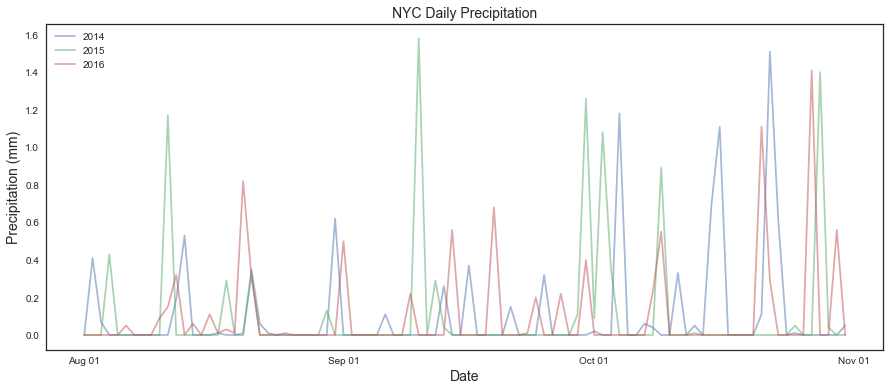

In [51]:
from datetime import datetime
from matplotlib import dates

# create the figure
fig, ax = plt.subplots(figsize=(15,6)) 

# loop through the years
for year in np.unique(nyc_temp.index.year):

    # get the data for the current year
    df = nyc_temp[str(year)]

    # create our x values (we need to map the date value to a number format)
    x = dates.date2num([datetime.strptime(d, '%b %d') for d in df['month_day']])
    
    # our y values will just be the precipitation
    y = df['precipitation'].values
    
    # plot the data
    plt.plot(x, y, alpha=0.5, label = year)

# we want to format the x axis to show the month and day
xaxis_label_formatter = dates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(xaxis_label_formatter)
ax.xaxis.set_major_locator(dates.MonthLocator())  
    
# setup our labels
plt.title('NYC Daily Precipitation', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.xlabel('Date', fontsize=14)

# setup legend
plt.legend(loc='best')
fig.savefig('./figures/nyc_daily_precipitation')
plt.show()

As we did for temperature - what does the average of 3 years data look like for precipitation?

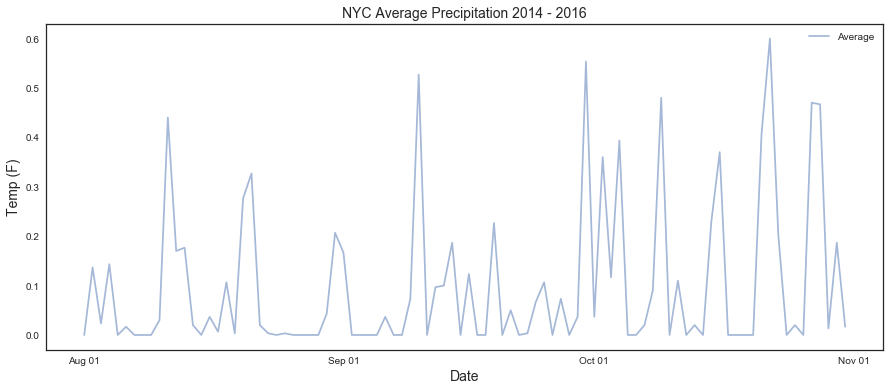

In [52]:
# create the figure
fig, ax = plt.subplots(figsize=(15,6)) 

# plot the daily average
x = dates.date2num([datetime.strptime(d, '%b %d') for d in nyc_temp_daily_avg['month_day']])
y = nyc_temp_daily_avg['precipitation']
plt.plot(x, y, alpha=0.5, label='Average')

# we want to format the x axis to show the month and day
xaxis_label_formatter = dates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(xaxis_label_formatter)
ax.xaxis.set_major_locator(dates.MonthLocator())  
    
# setup our labels
plt.title('NYC Average Precipitation 2014 - 2016', fontsize=14)
plt.ylabel('Temp (F)', fontsize=14)
plt.xlabel('Date', fontsize=14)

# setup legend
plt.legend(loc='best')
fig.savefig('./figures/nyc_daily_avg_precipitation')
plt.show()

We can see that a as we enter the end of September and into October, the chances of precipitation increases.

Did any days recieve snow?

In [42]:
len(nyc_temp[nyc_temp.new_snow > 0])

0

In [43]:
len(nyc_temp[nyc_temp.snow_depth > 0])

0

No days recieved any snow, so we can leave these columns out of our analysis. Let's drop them so we do not get confused.

In [44]:
nyc_temp_daily_avg.drop(['new_snow', 'snow_depth'], axis=1, inplace=True)

In [45]:
# ensure indices are named correctly
nyc_temp_daily_avg.index.set_names(['month','day'],inplace=True)

## 6. Exploring Pleasant Days
___

How many days do we actually have each year where the weather is pleasant? We define a pleasant day as
* avg temp >= 60F
* precipitation < 0.05 mm

In [46]:
# filter days to only have pleasant weather
temp_mask = nyc_temp_daily_avg['temp_avg'] >= 60
precip_mask = nyc_temp_daily_avg['precipitation'] < 0.05
nyc_temp_daily_avg['pleasant_day'] = temp_mask & precip_mask

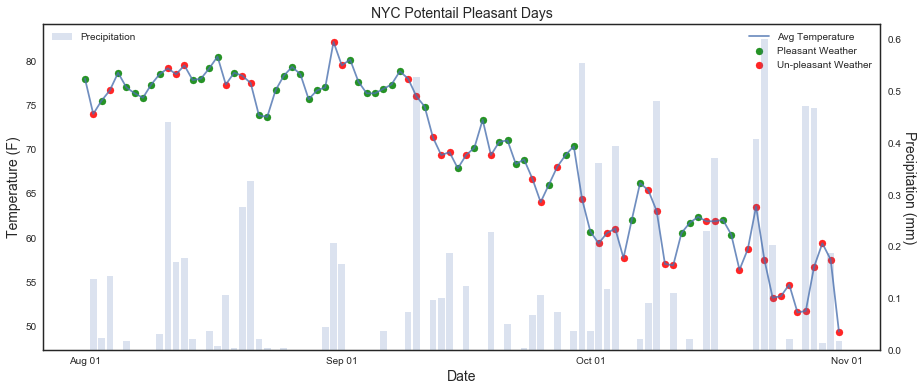

In [53]:
# Let's plot the results

# setup the plot
fig, ax = plt.subplots(figsize=(15,6)) 

# setup our xaxis labels
date_formatter = dates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(date_formatter)
ax.xaxis.set_major_locator(dates.MonthLocator())

# find the plot for the year
x = dates.date2num([datetime.strptime(d, '%b %d') for d in nyc_temp_daily_avg.month_day])
y = nyc_temp_daily_avg.temp_avg

# create the plot
plt.plot(x, y, alpha=0.8, label='Avg Temperature')

# find pleasant weather
pleasant_days = nyc_temp_daily_avg[nyc_temp_daily_avg.pleasant_day == True]
unpleasant_days = nyc_temp_daily_avg[nyc_temp_daily_avg.pleasant_day == False]
    
# find pleasant days
x_p = dates.date2num([datetime.strptime(d, '%b %d') for d in pleasant_days.month_day])
y_p = pleasant_days.temp_avg

# find the unpleasant days
x_up = dates.date2num([datetime.strptime(d, '%b %d') for d in unpleasant_days.month_day])
y_up = unpleasant_days.temp_avg

# create the plot
plt.scatter(x_p, y_p, label = 'Pleasant Weather', color='g', alpha=0.85)
plt.scatter(x_up, y_up, label = 'Un-pleasant Weather', color='r', alpha=0.85)

# create 2nd axis
ax2 = ax.twinx()
y2 = nyc_temp_daily_avg.precipitation
ax2.bar(x, y2, alpha=0.2, label='Precipitation')
ax2.grid(False)

# set the labels
plt.title('NYC Potentail Pleasant Days', fontsize=14)
ax.set_ylabel('Temperature (F)', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax2.set_ylabel('Precipitation (mm)', rotation=270, labelpad=15, fontsize=14)

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('./figures/nyc_weather_pleasant_days')

plt.show()

We see from the graph that the majority of pleasant days occur in August and September.  

## 7. Data Export

With the initial analysis complete, we can export our nyc_temp dataframe so that we can easily import a cleaned dataframe at any point in the future

In [25]:
# export to file
nyc_temp_daily_avg.to_csv('./data/nyc_weather_pleasant_days.csv')

## 8. Conclusions

We have observed that there are 48 potential pleasant days over the August to October time frame:

In [328]:
nyc_temp_daily_avg[nyc_temp_daily_avg.pleasant_day == True][['temp_avg', 'precipitation','month_day']]

temp_avg  precipitation month_day
8  1   78.000000       0.000000    Aug 01
   3   75.500000       0.023333    Aug 03
   5   78.666667       0.000000    Aug 05
   6   77.000000       0.016667    Aug 06
   7   76.333333       0.000000    Aug 07
   8   75.833333       0.000000    Aug 08
   9   77.333333       0.000000    Aug 09
   10  78.500000       0.030000    Aug 10
   14  77.833333       0.020000    Aug 14
   15  78.000000       0.000000    Aug 15
   16  79.166667       0.036667    Aug 16
   17  80.500000       0.006667    Aug 17
   19  78.666667       0.003333    Aug 19
   22  73.833333       0.020000    Aug 22
   23  73.666667       0.003333    Aug 23
   24  76.666667       0.000000    Aug 24
   25  78.333333       0.003333    Aug 25
   26  79.333333       0.000000    Aug 26
   27  78.500000       0.000000    Aug 27
   28  75.666667       0.000000    Aug 28
   29  76.666667       0.000000    Aug 29
   30  77.000000       0.043333    Aug 30
9  2   80.166667       0.000000    Sep 02
   3   77.666667       0.000000    Sep 03
   4   76.333333       0.000000    Sep 04
   5   76.333333       0.000000    Sep 05
   6   76.833333       0.036667    Sep 06
   7   77.333333       0.000000    Sep 07
   8   78.833333       0.000000    Sep 08
   11  74.833333       0.000000    Sep 11
   15  67.833333       0.000000    Sep 15
   17  70.166667       0.000000    Sep 17
   18  73.333333       0.000000    Sep 18
   20  70.833333       0.000000    Sep 20
   21  71.000000       0.050000    Sep 21
   22  68.333333       0.000000    Sep 22
   23  68.833333       0.003333    Sep 23
   26  66.000000       0.000000    Sep 26
   28  69.333333       0.000000    Sep 28
   29  70.333333       0.036667    Sep 29
10 1   60.666667       0.036667    Oct 01
   6   62.000000       0.000000    Oct 06
   7   66.166667       0.020000    Oct 07
   12  60.500000       0.000000    Oct 12
   13  61.666667       0.020000    Oct 13
   14  62.333333       0.000000    Oct 14
   17  62.000000       0.000000    Oct 17
   18  60.333333       0.000000    Oct 18

In [327]:
len(nyc_temp_daily_avg[nyc_temp_daily_avg.pleasant_day == True])

48